In [3]:
import pandas as pd

# 1. Construir la tabla de Productos
# Esta tabla funciona como un catálogo maestro
data_productos = {
    'ID_Producto': [101, 102, 103, 104],
    'Nombre_Producto': ['Laptop', 'Mouse', 'Monitor', 'Teclado'],
    'Categoría': ['Electrónica', 'Accesorios', 'Electrónica', 'Accesorios'],
    'Precio_Unitario': [800, 25, 200, 45]
}
productos = pd.DataFrame(data_productos)

# 2. Construir la tabla de Ventas
# Aquí es donde registramos las transacciones diarias
data_ventas = {
    'ID_Venta': [1, 2, 3, 4, 5, 6],
    'ID_Producto': [101, 102, 101, 103, 104, 102],
    'ID_Cliente': [501, 502, 501, 503, 502, 501],
    'Monto': [800, 25, 800, 200, 45, 25],
    'Región': ['Norte', 'Sur', 'Norte', 'Este', 'Sur', 'Norte']
}
ventas = pd.DataFrame(data_ventas)

# 3. (Opcional) Tabla de Clientes para completar el merge del código anterior
data_clientes = {
    'ID_Cliente': [501, 502, 503],
    'Nombre_Cliente': ['Ana García', 'Luis Pérez', 'María López']
}
clientes = pd.DataFrame(data_clientes)

# Mostrar las tablas creadas
print("--- Tabla Productos ---")
print(productos)
print("\n--- Tabla Ventas ---")
print(ventas.head())
print("\n--- Tabla Clientes ---")
print(clientes.head())

--- Tabla Productos ---
   ID_Producto Nombre_Producto    Categoría  Precio_Unitario
0          101          Laptop  Electrónica              800
1          102           Mouse   Accesorios               25
2          103         Monitor  Electrónica              200
3          104         Teclado   Accesorios               45

--- Tabla Ventas ---
   ID_Venta  ID_Producto  ID_Cliente  Monto Región
0         1          101         501    800  Norte
1         2          102         502     25    Sur
2         3          101         501    800  Norte
3         4          103         503    200   Este
4         5          104         502     45    Sur

--- Tabla Clientes ---
   ID_Cliente Nombre_Cliente
0         501     Ana García
1         502     Luis Pérez
2         503    María López


/tmp/ipython-input-3025293231.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  reporte_regiones = analisis.pivot_table(


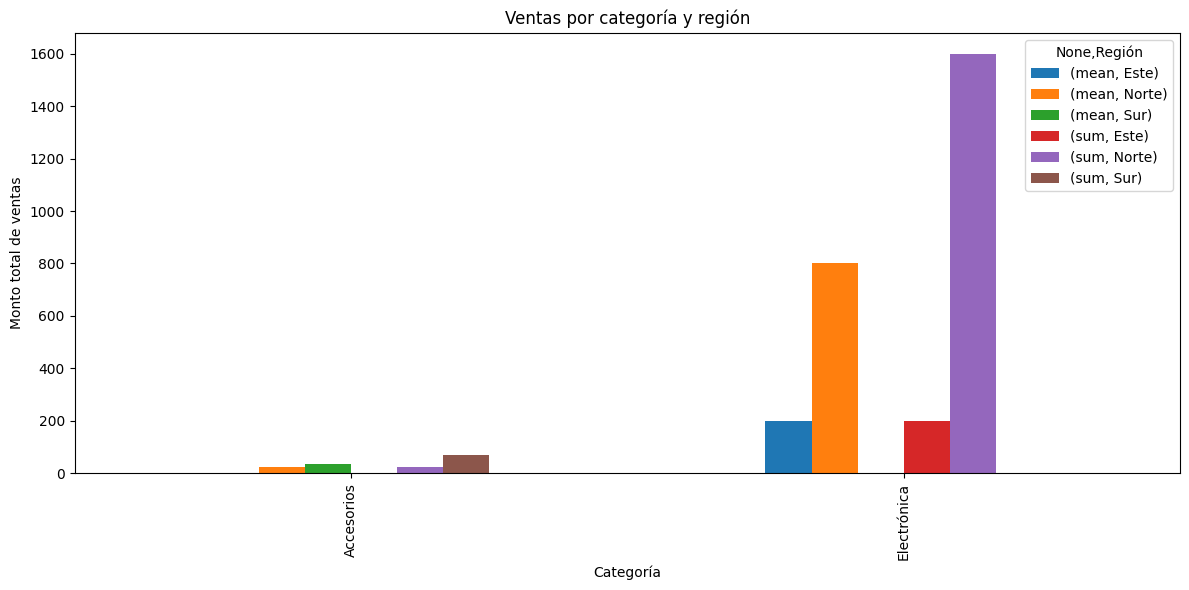

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Combinar tablas
df_completo = pd.merge(ventas, productos, on='ID_Producto')
df_completo = pd.merge(df_completo, clientes, on='ID_Cliente')

# 2. Agrupar por categoría y región
analisis = df_completo.groupby(['Categoría', 'Región']).agg({'Monto': ['sum','mean'], 'ID_Venta': 'count'}).reset_index()

# 3. Pivotar para crear reporte por región
reporte_regiones = analisis.pivot_table(
    index='Categoría',
    columns='Región',
    values='Monto' # Corregido: 'Monto' ya contiene la suma, 'sum' no es un nombre de columna
)

# 4. Visualizar resultados
reporte_regiones.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por categoría y región')
plt.ylabel('Monto total de ventas')
plt.tight_layout()
plt.show()

In [12]:
df_completo

,ID_Venta,ID_Producto,ID_Cliente,Monto,Región,Nombre_Producto,Categoría,Precio_Unitario,Nombre_Cliente
0,1,101,501,800,Norte,Laptop,Electrónica,800,Ana García
1,2,102,502,25,Sur,Mouse,Accesorios,25,Luis Pérez
2,3,101,501,800,Norte,Laptop,Electrónica,800,Ana García
3,4,103,503,200,Este,Monitor,Electrónica,200,María López
4,5,104,502,45,Sur,Teclado,Accesorios,45,Luis Pérez
5,6,102,501,25,Norte,Mouse,Accesorios,25,Ana García


In [13]:
analisis

Categoría Región Monto        ID_Venta
                        sum   mean    count
0   Accesorios  Norte    25   25.0        1
1   Accesorios    Sur    70   35.0        2
2  Electrónica   Este   200  200.0        1
3  Electrónica  Norte  1600  800.0        2

In [14]:
reporte_regiones

mean                 sum              
Región        Este  Norte   Sur   Este   Norte   Sur
Categoría                                           
Accesorios     NaN   25.0  35.0    NaN    25.0  70.0
Electrónica  200.0  800.0   NaN  200.0  1600.0   NaN

In [18]:
import pandas as pd

# 1. Datos de ejemplo
data = {
    'Fecha': pd.date_range(start='2023-01-01', periods=12, freq='ME'), # 'M' ha sido actualizado a 'ME' en versiones recientes
    'Producto': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'Ventas': [100, 150, 120, 180, 90, 160, 110, 190, 130, 200, 140, 210]
}

df = pd.DataFrame(data)
df

,Fecha,Producto,Ventas
0,2023-01-31,A,100
1,2023-02-28,B,150
2,2023-03-31,A,120
3,2023-04-30,B,180
4,2023-05-31,A,90
5,2023-06-30,B,160
6,2023-07-31,A,110
7,2023-08-31,B,190
8,2023-09-30,A,130
9,2023-10-31,B,200


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      12 non-null     datetime64[ns]
 1   Producto   12 non-null     object        
 2   Ventas     12 non-null     int64         
 3   Trimestre  12 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 468.0+ bytes


In [20]:
# 2. Añadir columna de trimestre
df['Trimestre'] = df['Fecha'].dt.quarter
df

,Fecha,Producto,Ventas,Trimestre
0,2023-01-31,A,100,1
1,2023-02-28,B,150,1
2,2023-03-31,A,120,1
3,2023-04-30,B,180,2
4,2023-05-31,A,90,2
5,2023-06-30,B,160,2
6,2023-07-31,A,110,3
7,2023-08-31,B,190,3
8,2023-09-30,A,130,3
9,2023-10-31,B,200,4


In [15]:




# 3. Agrupar por trimestre y producto
ventas_trim = df.groupby(['Trimestre', 'Producto'])['Ventas'].sum().reset_index()

# 4. Pivotar para crear informe
informe = ventas_trim.pivot(index='Trimestre', columns='Producto', values='Ventas')

# Mostrar el resultado final
print("Informe de ventas por trimestre y producto:")
print(informe)

Informe de ventas por trimestre y producto:
Producto     A    B
Trimestre          
1          220  150
2           90  340
3          240  190
4          140  410
